In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_returns_df = pd.read_csv(whale_returns_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

# Sorting by index
whale_returns_df.sort_index(ascending=True,inplace=True)

# Printing sample
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Counting nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Dropping nulls
whale_returns_df.dropna(inplace=True)

# Recounting nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

# Sorting by index
algo_returns_df.sort_index(ascending=True,inplace=True)

# Printing sample
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Counting nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Dropping nulls
algo_returns_df.dropna(inplace=True)

# Recounting nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
# Reading Close closing prices
tsx_history_csv = Path("Resources/sp_tsx_history.csv")

tsx_history_df = pd.read_csv(tsx_history_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

# Sorting by index
tsx_history_df.sort_index(ascending=True,inplace=True)

# Printing sample
tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Checking data type
tsx_history_df.dtypes

Close    object
dtype: object

In [10]:
# # Fixing data types
tsx_history_df['Close']=[x[1:] for x in tsx_history_df.Close]

In [11]:
tsx_history_df['Close'] = tsx_history_df['Close'].replace(',','', regex=True)

In [12]:
# tsx_history_df['Close'] = tsx_history_df['Close'].str.replace('$','')

# np.frombuffer(tsx_history_df.Close.values.astype('|S7').tobytes().replace(b'$',b''), dtype='|S6')

# # Removing dollar sign 
# # tsx_history_df['Close'] = tsx_history_df['Close'].str.replace('$','')
# # tsx_history_df.head()

tsx_history_df ['Close'] = tsx_history_df.Close.replace('',np.nan)

In [13]:
# # Converting to float
# # tsx_float = tsx_history_df['Close'].astype('float')

# # # df["Numbers"] = [float(str(i).replace(",", "")) for i in df["Numbers"]]
# tsx_history_df["Close"]=[pd.to_numeric(str(i).replace("$", "")) for i in tsx_history_df["Close"]]


# # df['a']=df.a.replace('',np.nan).astype(float)
# tsx_history_df ['Close'] = tsx_history_df.Close.replace('',np.nan)

tsx_float = tsx_history_df['Close'].astype('float')

# # # Confirming data type conversion
# # print(tsx_history_float.dtypes)

In [14]:
tsx_float.head()

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
Name: Close, dtype: float64

In [15]:
# Calculating daily returns
tsx_daily_returns = tsx_float.pct_change()

# Confirming change
tsx_daily_returns.head()

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
Name: Close, dtype: float64

In [16]:
# Dropping nulls
tsx_daily_returns.dropna(inplace=True)

In [17]:
tsx_daily_returns.head()

Date
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
2012-10-09   -0.011709
Name: Close, dtype: float64

In [18]:
# Renaming "Close" column
tsx_daily_returns.columns = ['Close']

# Confirming change
tsx_daily_returns.head()

Date
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
2012-10-09   -0.011709
Name: Close, dtype: float64

In [19]:
##Combine Whale, Algorithmic, and Close Returns
# Concatenating all DataFrames into a single DataFrame
all_returns_df = pd.concat([whale_returns_df,algo_returns_df,tsx_daily_returns], axis='columns', join='inner')

# Sorting by index
all_returns_df.sort_index(ascending=True, inplace=True)

# Confirming successful concatenation
all_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


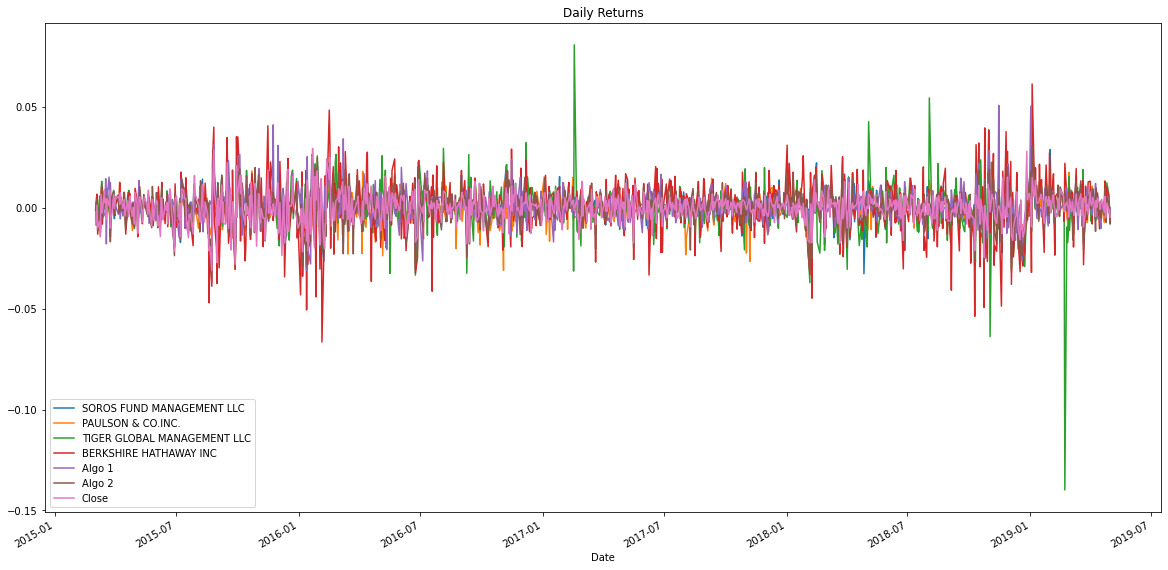

In [20]:
#### Performance Analysis
all_returns_df.plot(title='Daily Returns', figsize=(20,10))

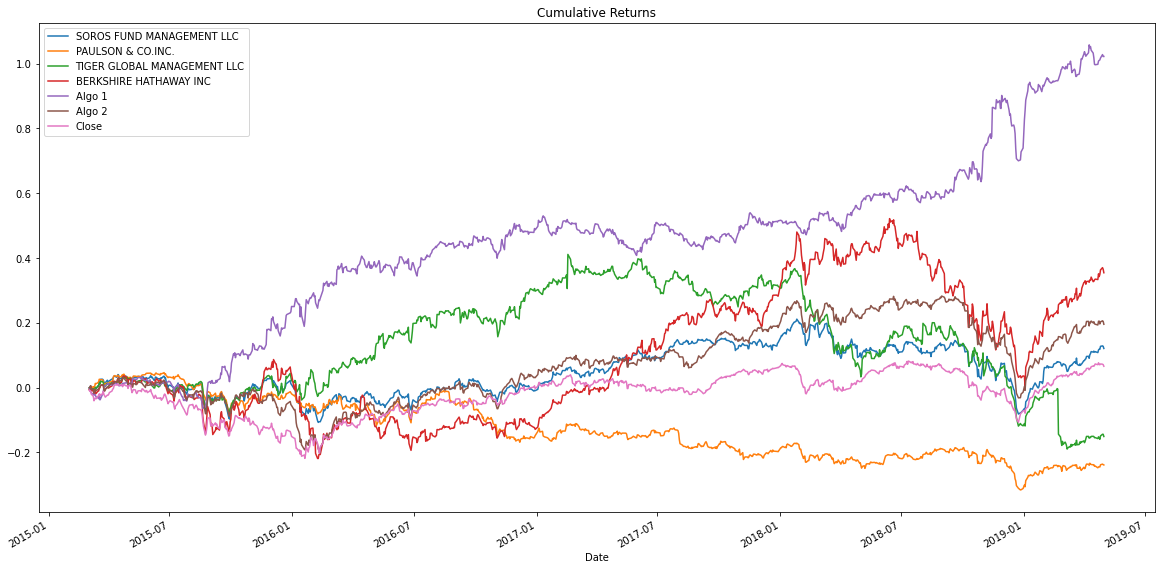

In [21]:
# Ploting cumulative returns
((all_returns_df + 1).cumprod() - 1).plot(title='Cumulative Returns', figsize=(20,10))

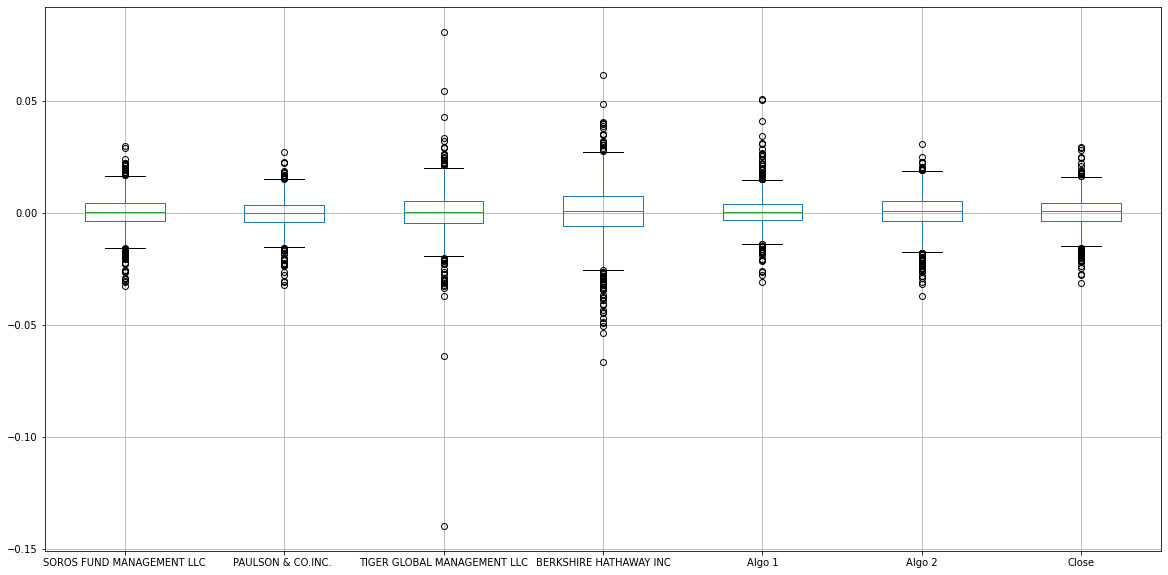

In [22]:
#### Risk Analysis

# Box plotting to visually show risk
all_returns_df.boxplot(figsize=(20,10))


In [23]:
# Daily Standard Deviations

# Calculating the standard deviations for each portfolio and assigning to new dataframe
std_df = all_returns_df.std().to_frame()

# Naming Standard Deviation column
std_df.columns = ['Std. Dev.']

# Printing standard deviations for each portfolio
std_df

,Std. Dev.
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
Close,0.007034


In [24]:
# Determining which portfolios are riskier than the Close
for index in std_df.index:
    if std_df['Std. Dev.'][index] > std_df.iloc[6,0]:
        print(f'{index} is riskier.')
    elif std_df['Std. Dev.'][index] < std_df.iloc[6,0]:
        print(f'{index} is safer.')
    else:
        print('')

SOROS FUND MANAGEMENT LLC is riskier.
PAULSON & CO.INC.  is safer.
TIGER GLOBAL MANAGEMENT LLC is riskier.
BERKSHIRE HATHAWAY INC is riskier.
Algo 1 is riskier.
Algo 2 is riskier.



In [25]:
# Calculating the annualized standard deviation (252 trading days) and assigning to new series
volatility = all_returns_df.std() * np.sqrt(252)

# Printing annualized standard deviation
volatility

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
Close                          0.111664
dtype: float64

In [26]:
#### Rolling Statistics

# Calculating the rolling standard deviations for the Close using a 21 day window
rolling_std = all_returns_df.rolling(window=21).std()

# Dropping nulls
rolling_std.dropna(inplace=True)

# Printing sample
rolling_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295


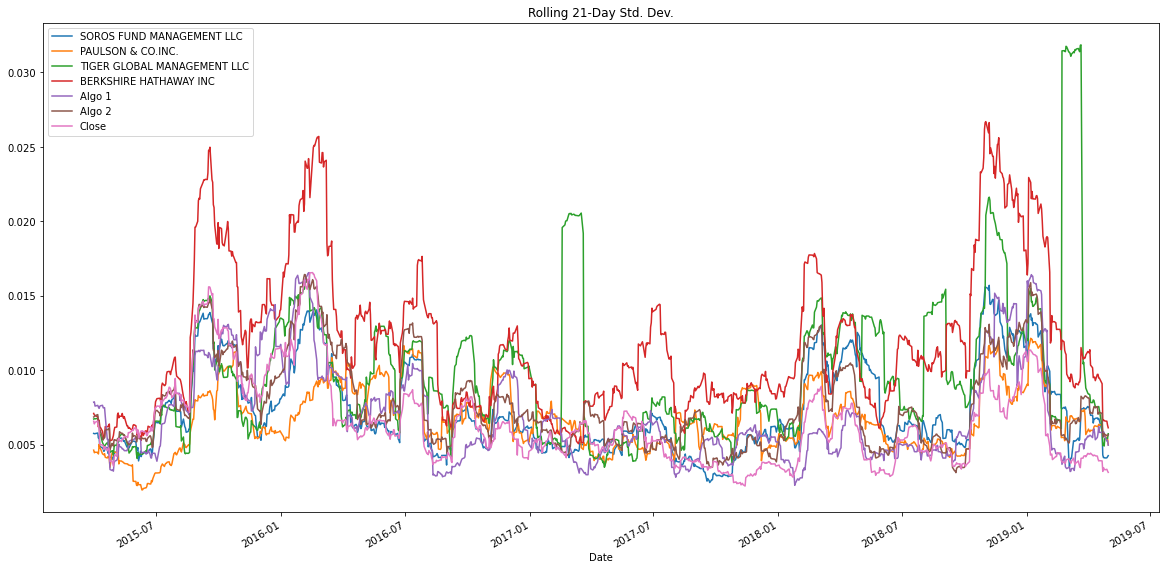

In [27]:
# Plotting the rolling standard deviation
rolling_std.plot(title='Rolling 21-Day Std. Dev.', figsize=(20,10))

In [28]:
# Calculating standard deviation correlation between all portfolios and the Close
rolling_std.corr(method='pearson')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.639357,0.440919,0.850889,0.704403,0.864039,0.753445
PAULSON & CO.INC.,0.639357,1.000000,0.399144,0.611234,0.572830,0.669701,0.437059
TIGER GLOBAL MANAGEMENT LLC,0.440919,0.399144,1.000000,0.400139,0.257098,0.349122,0.269010
BERKSHIRE HATHAWAY INC,0.850889,0.611234,0.400139,1.000000,0.778384,0.816004,0.744956
Algo 1,0.704403,0.572830,0.257098,0.778384,1.000000,0.757384,0.772080
Algo 2,0.864039,0.669701,0.349122,0.816004,0.757384,1.000000,0.861322
Close,0.753445,0.437059,0.269010,0.744956,0.772080,0.861322,1.000000


In [29]:
# Calculating correlation between all portfolios and the Close
all_returns_df.corr(method='pearson')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
Close,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


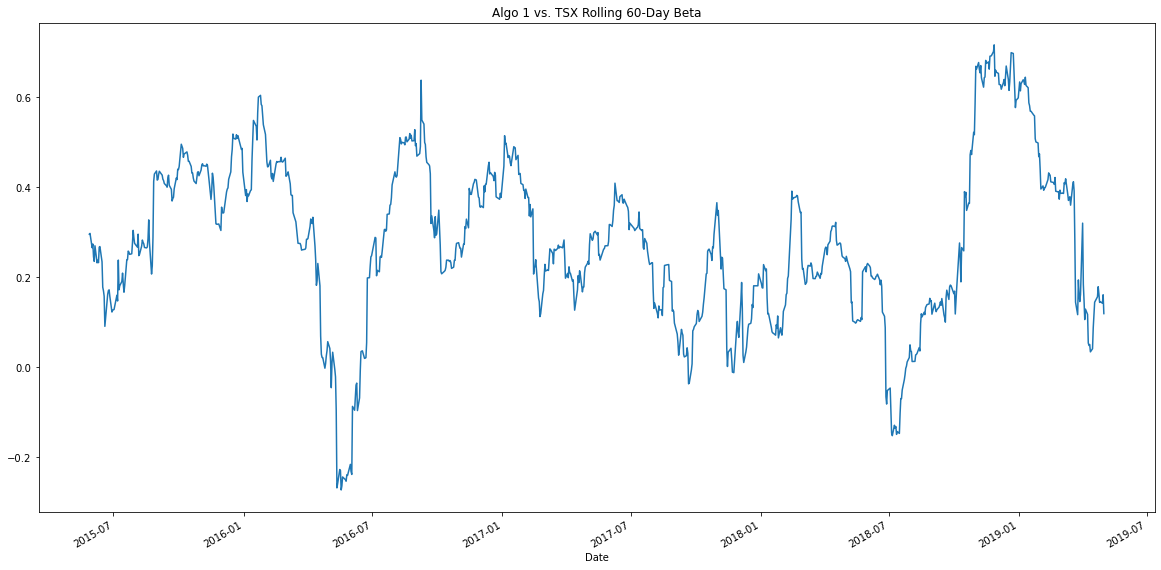

In [30]:
# Calculating beta for the Algo 1 portfolio vs. the Close
covariance = all_returns_df['Algo 1'].rolling(window=60).cov(all_returns_df['Close'].rolling(window=60))

variance = all_returns_df['Close'].rolling(window=60).var()

algo_1_beta = covariance / variance

algo_1_beta.dropna(inplace=True)

algo_1_beta.plot(title='Algo 1 vs. TSX Rolling 60-Day Beta', figsize=(20,10))

In [31]:


# Calculating exponentially weighted moving averages
ewm = all_returns_df.ewm(halflife=21).mean()

# Printing sample
ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436


In [32]:
### Plot Sharpe Ratios

# Calculating annualized Sharpe ratios
sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))

sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
Close                          0.195550
dtype: float64

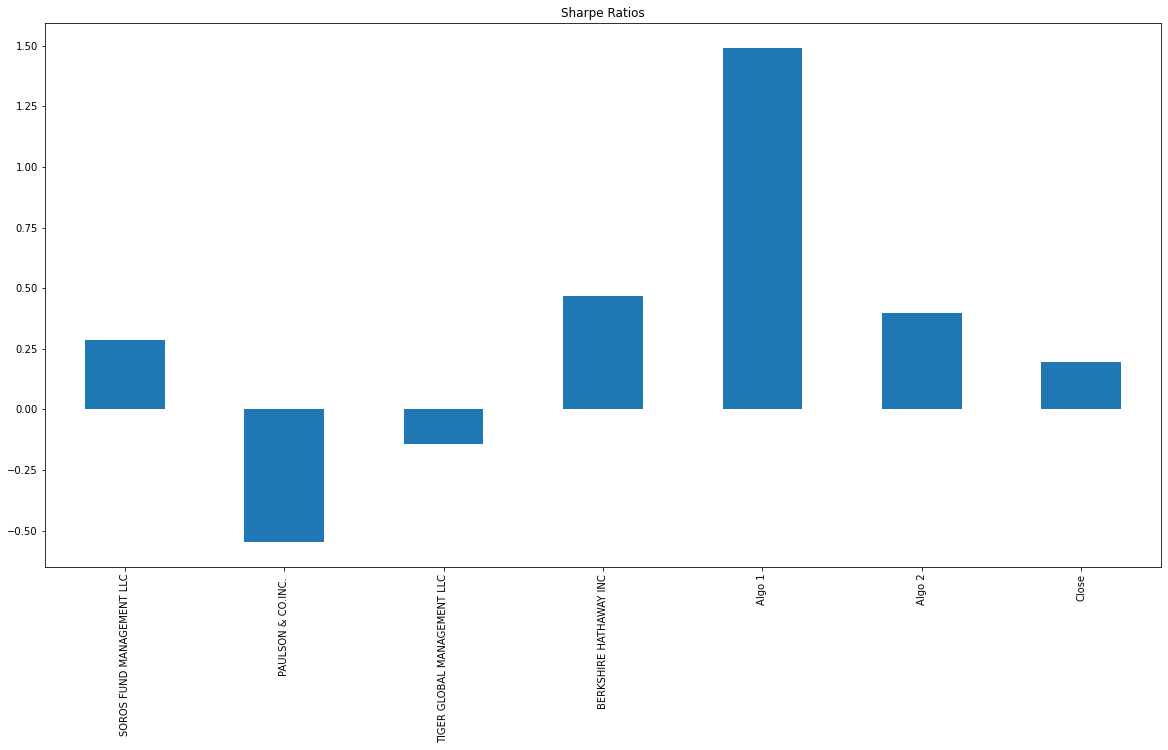

In [33]:
# Visualizing Sharpe ratios in a bar chart
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",figsize=(20,10))

In [34]:
### Create a Custom Portfolio
# Reading the first stock
aapl_prices_csv = Path("Resources/AAPL.csv")

aapl_prices_df = pd.read_csv(aapl_prices_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

# Sorting by index
aapl_prices_df.sort_index(ascending=True, inplace=True)

# Printing sample
aapl_prices_df.head()

,Close
Date,
2020-03-16,60.552502
2020-03-17,63.215000
2020-03-18,61.667500
2020-03-19,61.195000
2020-03-20,57.310001


In [35]:
# Read the second stock
fb_prices_csv = Path("Resources/FB.csv")

fb_prices_df = pd.read_csv(fb_prices_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

# Sorting by index
fb_prices_df.sort_index(ascending=True, inplace=True)

# Printing sample
fb_prices_df.head()

,Close
Date,
2020-03-16,146.009995
2020-03-17,149.419998
2020-03-18,146.960007
2020-03-19,153.130005
2020-03-20,149.729996


In [36]:
# Read the second stock
tsla_prices_csv = Path("Resources/TSLA.csv")

tsla_prices_df = pd.read_csv(tsla_prices_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

# Sorting by index
tsla_prices_df.sort_index(ascending=True, inplace=True)

# Printing sample
tsla_prices_df.head()

,Close
Date,
2020-03-16,89.014000
2020-03-17,86.040001
2020-03-18,72.244003
2020-03-19,85.528000
2020-03-20,85.505997


In [37]:
# Concatenating all stocks into a single dataframe
my_port = pd.concat([aapl_prices_df,fb_prices_df,tsla_prices_df], axis='columns', join='inner')

# Renaming columns
my_port.columns = ['AAPL','FB','TSLA']

# Printing sample
my_port.head()

,AAPL,FB,TSLA
Date,,,
2020-03-16,60.552502,146.009995,89.014000
2020-03-17,63.215000,149.419998,86.040001
2020-03-18,61.667500,146.960007,72.244003
2020-03-19,61.195000,153.130005,85.528000
2020-03-20,57.310001,149.729996,85.505997


In [38]:
# Resetting the index
my_port.reset_index()

,Date,AAPL,FB,TSLA
0,2020-03-16,60.552502,146.009995,89.014000
1,2020-03-17,63.215000,149.419998,86.040001
2,2020-03-18,61.667500,146.960007,72.244003
3,2020-03-19,61.195000,153.130005,85.528000
4,2020-03-20,57.310001,149.729996,85.505997
...,...,...,...,...
247,2021-03-09,121.089996,265.739990,673.580017
248,2021-03-10,119.980003,264.899994,668.059998
249,2021-03-11,121.959999,273.880005,699.599976
250,2021-03-12,121.029999,268.399994,693.729980


In [39]:
# Checking for null values
my_port.isnull().sum()

AAPL    0
FB      0
TSLA    0
dtype: int64

In [40]:
# Calculating weighted portfolio returns

# Assigning weights
weights = [1/3, 1/3, 1/3]

# Calculating daily returns
my_port_daily_returns = my_port.pct_change()

# Assigning portfolio weights and converting to dataframe
my_port_returns = my_port_daily_returns.dot(weights).to_frame()

# Dropping null values
my_port_returns.dropna(inplace=True)

# Renaming column
my_port_returns.columns = ['Portfolio Returns']

# Printing sample
my_port_returns.head()

,Portfolio Returns
Date,
2020-03-17,0.011305
2020-03-18,-0.067096
2020-03-19,0.072733
2020-03-20,-0.028649
2020-03-23,-0.005440


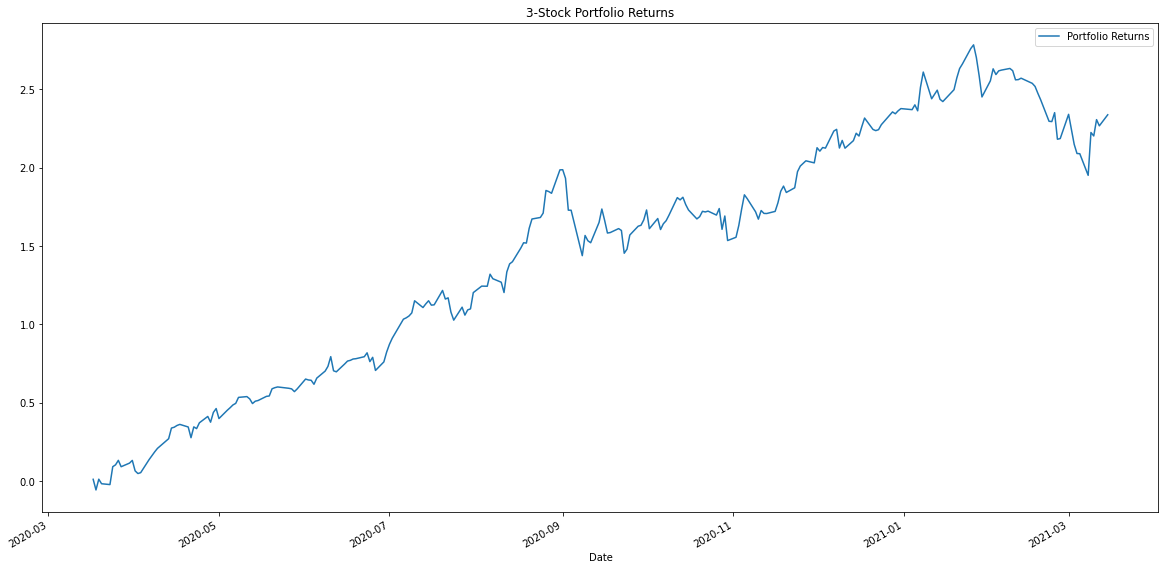

In [41]:
# Plotting cumulative returns for my portfolio
((my_port_returns + 1).cumprod() - 1).plot(title='3-Stock Portfolio Returns', figsize=(20,10))

In [42]:
##Join your portfolio returns to the DataFrame that contains all of the portfolio returns
# Concatenating my portolio returns to the main dataframe

all_port_returns = pd.concat([my_port_returns,all_returns_df], axis='columns')
all_port_returns.head()

# all_returns_df.head()

# my_port_returns.head()

,Portfolio Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,,
2015-03-03,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [43]:
# Checking for null values
all_port_returns.isnull().sum()

Portfolio Returns              1029
SOROS FUND MANAGEMENT LLC       251
PAULSON & CO.INC.               251
TIGER GLOBAL MANAGEMENT LLC     251
BERKSHIRE HATHAWAY INC          251
Algo 1                          251
Algo 2                          251
Close                           251
dtype: int64

In [44]:
# Renaming column for my portfolio returns
all_port_returns.rename(columns={'Portfolio Returns':'3-Stock Portfolio'},inplace=True)

# Confirming column name change
all_port_returns.head()

,3-Stock Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,,
2015-03-03,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


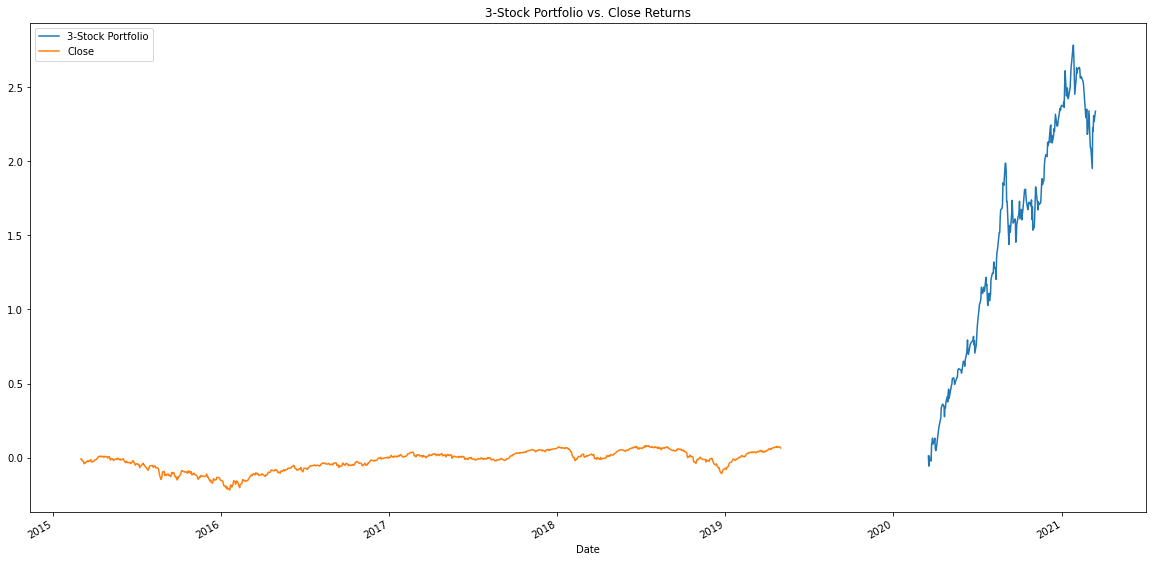

In [45]:
# Plotting cumulative returns of my portfolio vs. the Close

((all_port_returns[['3-Stock Portfolio','Close']] + 1).cumprod() - 1).plot(title='3-Stock Portfolio vs. Close Returns', figsize=(20,10))

In [46]:
# Renaming column for my portfolio returns
all_port_returns.rename(columns={'Portfolio Returns':'3-Stock Portfolio'},inplace=True)

# Confirming column name change
all_port_returns.head()

,3-Stock Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,,
2015-03-03,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


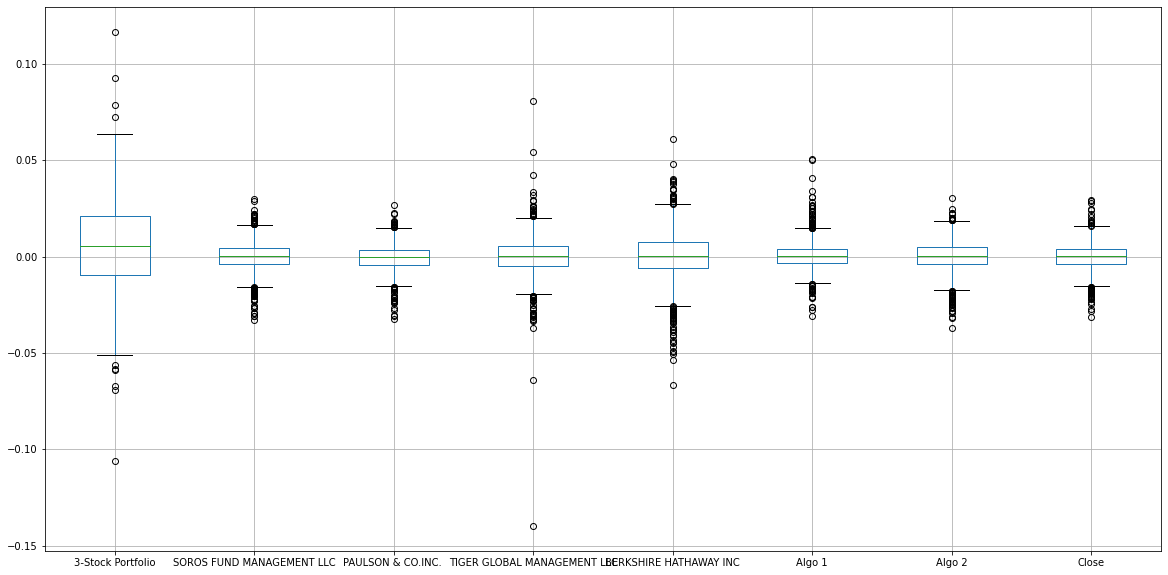

In [47]:
## Risk
# Box plotting all portfolios to show risk
all_port_returns.boxplot(figsize=(20,10))

In [48]:
# Calculating standard deviations for all portfolios and assigning to dataframe
all_std_df = all_port_returns.std().to_frame()

# Naming column
all_std_df.columns = ['Std. Dev.']

all_std_df

,Std. Dev.
3-Stock Portfolio,0.027903
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
Close,0.007034


In [49]:
# Calculating annualized standard deviation for all portfolios
all_volatility = all_port_returns.std() * np.sqrt(252)

all_volatility

3-Stock Portfolio              0.442948
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
Close                          0.111664
dtype: float64

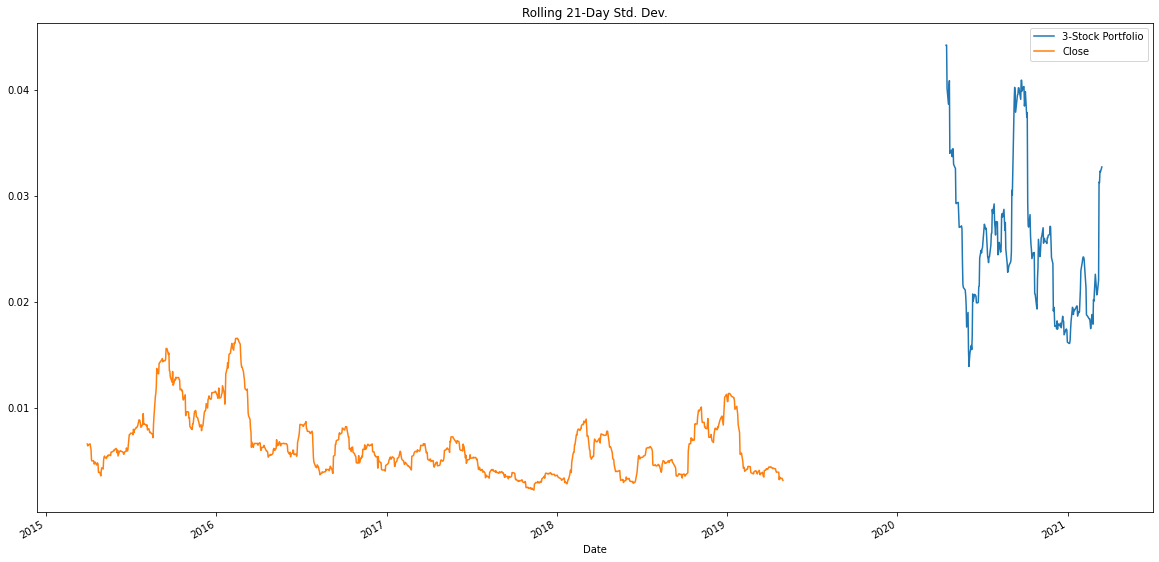

In [50]:
## Rolling

# Plotting rolling 21-day standard deviation for my portfolio vs. the Close
all_port_returns[['3-Stock Portfolio','Close']].rolling(window=21).std().plot(
    title="Rolling 21-Day Std. Dev.", figsize=(20,10))

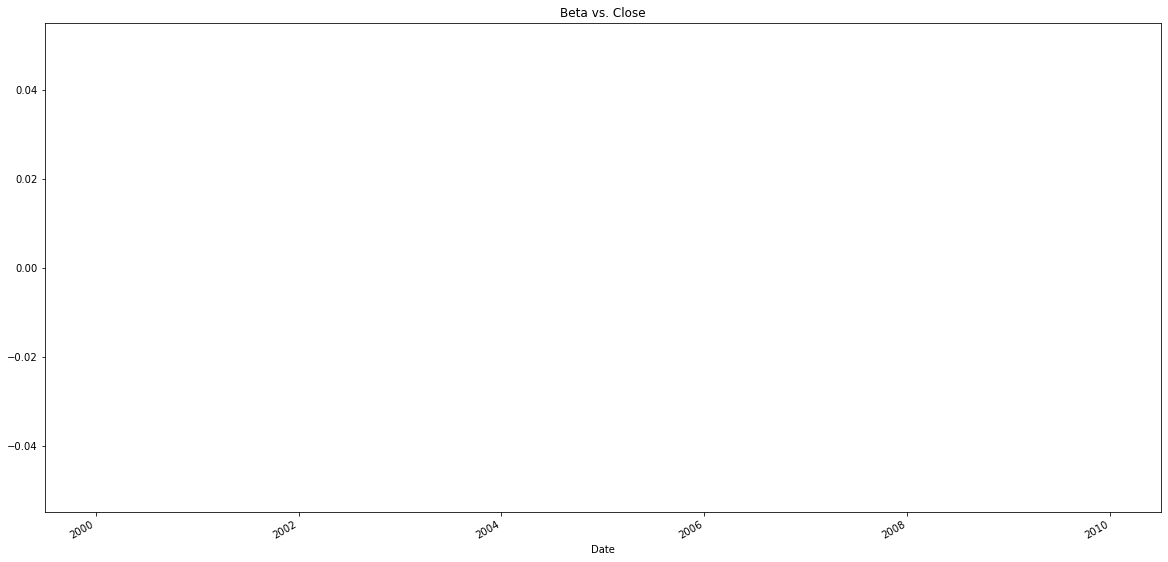

In [51]:
#Calculating beta of my portfolio vs. the Close
my_port_covariance = all_port_returns['3-Stock Portfolio'].rolling(window=60).cov(all_port_returns['Close'].rolling(window=60))
my_port_variance = all_port_returns['Close'].rolling(window=60).var()
my_port_beta = my_port_covariance / my_port_variance
my_port_beta.plot(title='Beta vs. Close',figsize=(20,10))

In [52]:
# Calculating annualized Sharpe ratios for all portfolios
all_sharpe_ratios = (all_port_returns.mean() * 252) / (all_port_returns.std() * np.sqrt(252))

all_sharpe_ratios

3-Stock Portfolio              2.958562
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
Close                          0.195550
dtype: float64

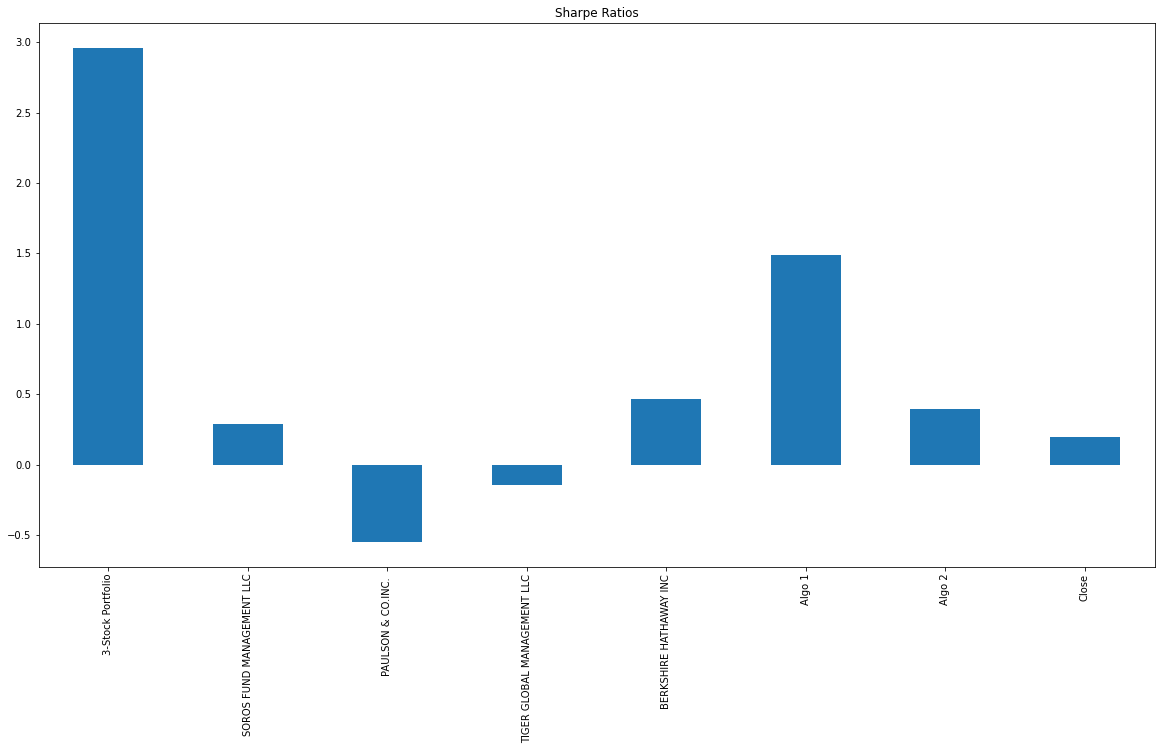

In [53]:
# Visualizing the Sharpe ratios as a bar chart
all_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",figsize=(20,10))

In [54]:
# Calculating correlation within my portfolio
my_port.corr(method='pearson')

,AAPL,FB,TSLA
AAPL,1.000000,0.911564,0.906450
FB,0.911564,1.000000,0.709319
TSLA,0.906450,0.709319,1.000000
